In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
noise = gpd.read_file("data/noise.zip")
transport_lines = gpd.read_file("data/transport_lines.zip")
metro_entrences = gpd.read_file("data/metro_entrences.zip")
roads = gpd.read_file("data/roads.zip")

In [3]:
noise_bounds = noise.unary_union

C:\Users\kajet\AppData\Local\Temp\ipykernel_45416\4229401385.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  noise_bounds = noise.unary_union


In [ ]:
# Ensure both GeoDataFrames use the same CRS
if noise.crs != transport_lines.crs:
    transport_lines = transport_lines.to_crs(noise.crs)

# Clip the public transportation lines to the noise map extent
trimmed_transportation = gpd.clip(transport_lines, noise_bounds)

print("Original public transportation features:", len(transport_lines))
print("Trimmed public transportation features:", len(trimmed_transportation))

Original public transportation features: 805
Trimmed public transportation features: 391


In [6]:
if noise.crs != roads.crs:
    roads = roads.to_crs(noise.crs)


# Clip the public transportation lines to the noise map extent
trimmed_roads = gpd.clip(roads, noise_bounds)

print("Original public transportation features:", len(roads))
print("Trimmed public transportation features:", len(trimmed_roads))

Original public transportation features: 49749
Trimmed public transportation features: 49477


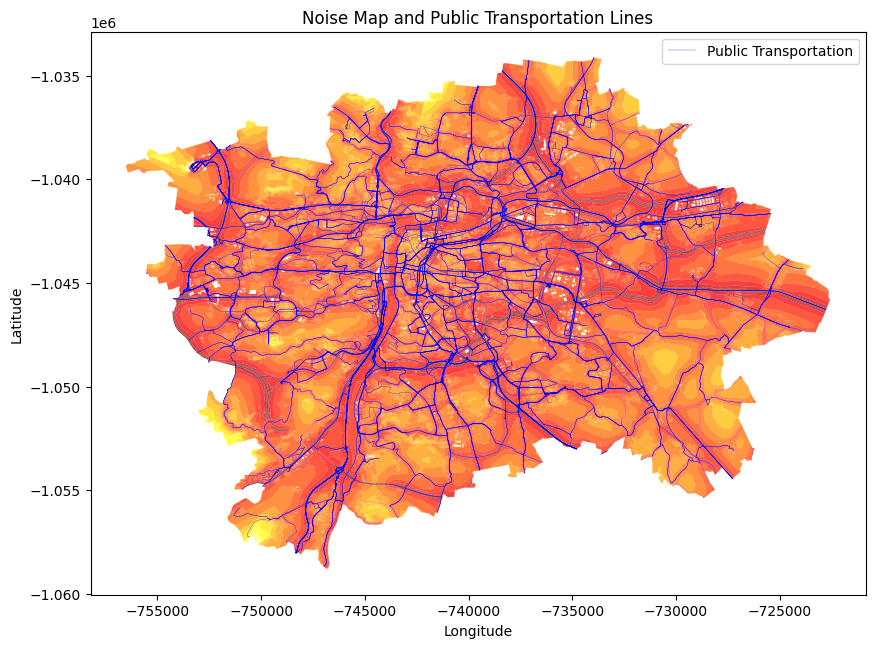

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
trimmed_transportation.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [36]:
trimmed_transportation

LIN_DATUM  LIN_CISLO LIN_ALIAS_  LIN_DD LIN_KAT_ID  \
123 2024-11-06        401        401       3          4   
524 2024-11-06        406        406       3          4   
28  2024-11-06       1209         R9       5         13   
531 2024-11-06        402        402       3          4   
732 2024-11-06        381        381       3          4   
..         ...        ...        ...     ...        ...   
605 2024-11-06        730        730       3          4   
606 2024-11-06        700        700       3          4   
435 2024-11-06        345        345       3          4   
206 2024-11-06        410        410       3          4   
122 2024-11-06        400        400       3          4   

                                            LIN_LINK_P  \
123  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
524  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
28   http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
531  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
732  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
..                                                 ...   
605  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
606  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
435  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
206  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   
122  http://jrportal.dpp.cz/jrportal/LineList.aspx?...   

                                   GLOBALID      SHAPE_LEN  \
123  {2639C8B4-B803-BCEB-E063-0B82360A6BFE}  254479.381010   
524  {2639C8B4-B99D-BCEB-E063-0B82360A6BFE}  180724.373466   
28   {2639C8B4-B7C4-BCEB-E063-0B82360A6BFE}  125175.320682   
531  {2639C8B4-B9A2-BCEB-E063-0B82360A6BFE}  208566.968926   
732  {2639C8B4-B9FA-BCEB-E063-0B82360A6BFE}   87057.338526   
..                                      ...            ...   
605  {2639C8B4-BA2C-BCEB-E063-0B82360A6BFE}  216053.877523   
606  {2639C8B4-BA2D-BCEB-E063-0B82360A6BFE}  209810.857264   
435  {2639C8B4-B93D-BCEB-E063-0B82360A6BFE}  345995.678469   
206  {2639C8B4-B851-BCEB-E063-0B82360A6BFE}  124874.477783   
122  {2639C8B4-B802-BCEB-E063-0B82360A6BFE}  190025.258540   

                                              geometry  
123  MULTILINESTRING ((-734784.976 -1053004.945, -7...  
524  MULTILINESTRING ((-734784.882 -1053004.851, -7...  
28   MULTILINESTRING ((-736910.134 -1042329.876, -7...  
531  MULTILINESTRING ((-734784.882 -1053004.851, -7...  
732  MULTILINESTRING ((-730350 -1051024, -730340 -1...  
..                                                 ...  
605  MULTILINESTRING ((-727770.375 -1040460.032, -7...  
606  MULTILINESTRING ((-727770.34 -1040460.032, -72...  
435  MULTILINESTRING ((-731472.06 -1042178.312, -73...  
206  MULTILINESTRING ((-738389.968 -1034773.879, -7...  
122  MULTILINESTRING ((-738389.968 -1034773.879, -7...  

[391 rows x 9 columns]

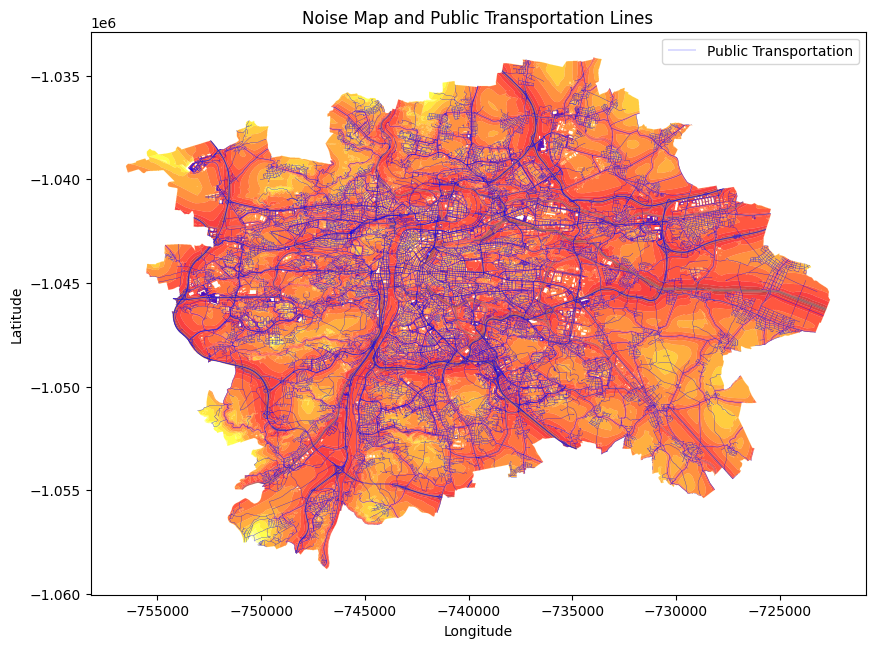

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
trimmed_roads.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

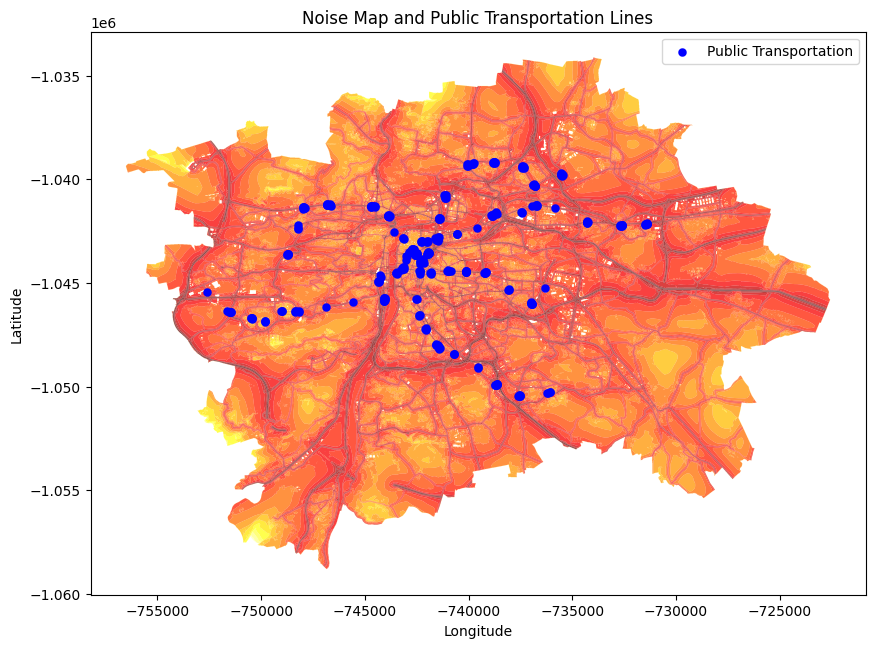

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
metro_entrences.plot(ax=ax, color="blue", linewidth=0.1, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [29]:
trimmed_roads

USEK_NAZ  DALNICE  TRIDASIL  TRIDAMK  TYPKOMUNIK  \
34512   pokračování-pokračování        0         1        0          11   
34511   pokračování-Strakonická        0         1        0          11   
33820   Jílovišťská-Jílovišťská        0         1        0          13   
38969   pokračování-Strakonická        0         1        0          11   
34509   pokračování-pokračování        0         1        0          11   
...                         ...      ...       ...      ...         ...   
33528  pokračování-Schoellerova        0         0        2           3   
16900         Za tratí-Za tratí        0         0        2           1   
33530  Schoellerova-pokračování        0         0        2           3   
16978           Za tratí-NN7588        0         0        2           3   
181         Schoellerova-NN7589        0         3        0           0   

                                     GLOBALID           MKN  SMEROVOST  \
34512  {70524D00-4586-46ED-BC91-A1262FA7751D}     Na Baních          2   
34511  {30659C84-567C-4D8C-A9F9-0D4E4B0D8F80}     Na Baních          1   
33820  {F92D8FC8-CEB5-4AEB-A2D6-4AD6F6C679F2}   Strakonická          2   
38969  {E6AA76F5-8A49-4F91-B4AC-01AD7C1DC7D0}   Jílovišťská          1   
34509  {411AAD20-E4B3-4ECB-A3E2-AE5EB013DD39}     Na Baních          0   
...                                       ...           ...        ...   
33528  {B66A8D1C-9C3D-4E40-A6BA-BD26319C3238}      Za tratí          0   
16900  {67A8A096-A0B7-47F8-A22F-61C4DD0AEB74}  Schoellerova          0   
33530  {9FE4FB4D-7110-4E30-858B-27780479BB00}      Za tratí          1   
16978  {88C1CBFF-A244-44B7-BA46-FB04D30F913F}  Schoellerova          0   
181    {156FE02B-B99E-4B8E-9267-3BFC06FDF31C}        NN7588          0   

         SHAPE_LEN                                           geometry  
34512    32.649655    LINESTRING (-748272 -1058025, -748297 -1058046)  
34511    54.548647  LINESTRING (-748272 -1058025, -748291.11 -1058...  
33820    85.442282  LINESTRING (-748337.378 -1058022.589, -748322....  
38969    81.442925  LINESTRING (-748345 -1057958, -748336 -1057977...  
34509    86.718815  LINESTRING (-748208.89 -1057965.97, -748214 -1...  
...            ...                                                ...  
33528    34.472925  LINESTRING (-734487.5 -1034964.83, -734481.87 ...  
16900    93.936898  LINESTRING (-734457.69 -1034970.34, -734474.17...  
33530    88.063734  LINESTRING (-734474.17 -1034877.86, -734477.75...  
16978   544.981645  LINESTRING (-734474.17 -1034877.86, -734498.66...  
181    1154.459703  MULTILINESTRING ((-734568 -1034341.02, -734568...  

[49477 rows x 10 columns]

In [43]:
trimmed_roads['DALNICE'].unique()

array([0, 1], dtype=int32)

In [45]:
trimmed_roads['TRIDASIL'].unique()

array([1, 0, 2, 3], dtype=int32)

In [51]:
trimmed_roads['TRIDAMK'].unique()

array([0, 3, 4, 2, 1], dtype=int32)

In [36]:
trimmed_roads['TYPKOMUNIK'].unique()

array([11, 13, 37,  3,  1,  0, 33, 15, 27,  8, 19, 20, 14, 10, 35, 46, 45,
        9, 23, 21, 18, 31, 44, 26, 30,  5, 32, 22, 40, 43, 28, 12, 36, 34,
       39, 42, 16,  6,  4, 38, 25, 17,  2,  7, 24, 29], dtype=int32)

C:\Users\kajet\AppData\Local\Temp\ipykernel_45416\368221012.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


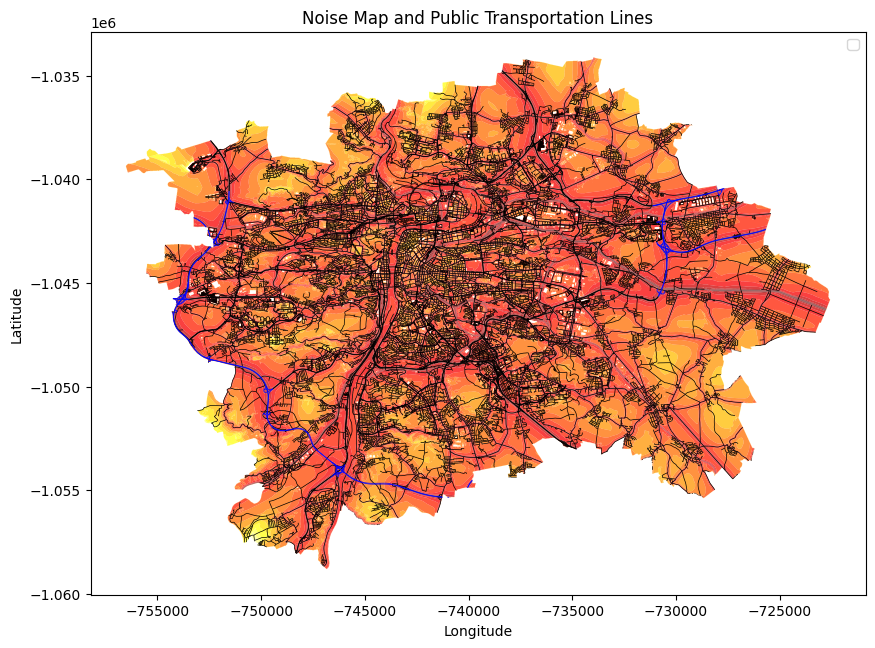

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

for value, group in trimmed_roads.groupby("DALNICE"):  # Replace 'ROAD_TYPE' with your column name
    label = "Highway" if value == 1 else "Other Roads"
    group.plot(
        ax=ax,
        color="blue" if value == 1 else "black",  # Different colors for each group
        linewidth=0.5,  # Adjust line width
    )
# Plot the public transportation lines
#metro_entrences.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [16]:
colors = {0: "green", 1: "blue", 2: "pink", 3: "black"}

C:\Users\kajet\AppData\Local\Temp\ipykernel_45416\568206420.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


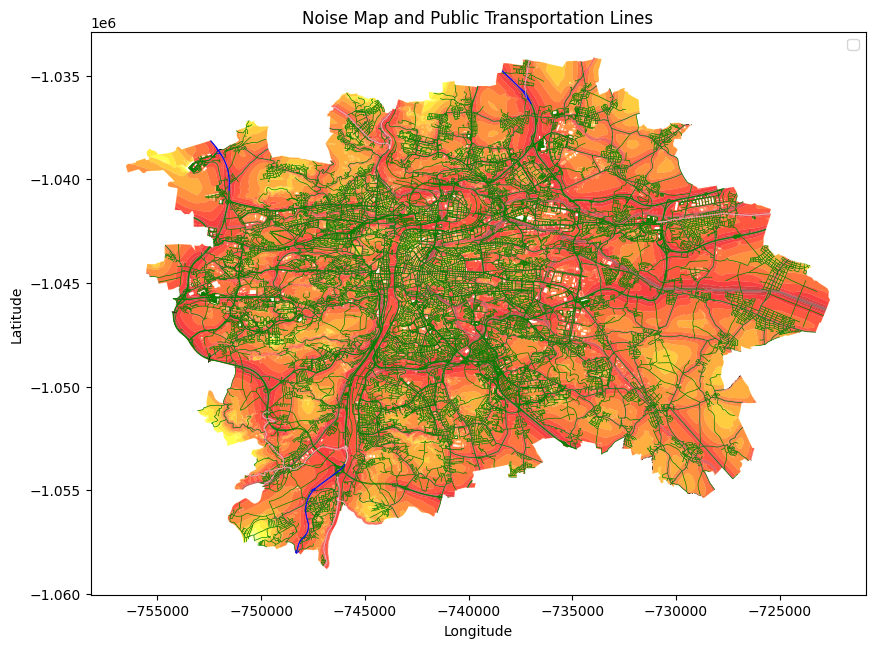

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

for value, group in trimmed_roads.groupby("TRIDASIL"):
    group.plot(
        ax=ax,
        color=colors.get(value, "gray"),  # Assign color based on the value
        linewidth=0.5,
    )
# Plot the public transportation lines
#metro_entrences.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [20]:
colors = {0: "green", 1: "blue", 2: "pink", 3: "black", 4: "purple"}

C:\Users\kajet\AppData\Local\Temp\ipykernel_45416\3590361352.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


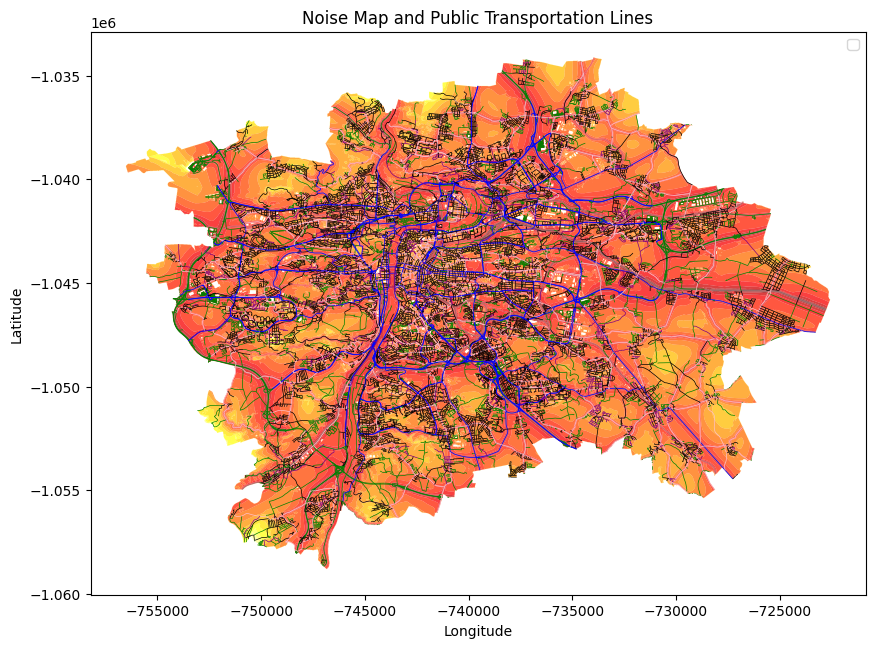

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

for value, group in trimmed_roads.groupby("TRIDAMK"):
    group.plot(
        ax=ax,
        color=colors.get(value, "gray"),  # Assign color based on the value
        linewidth=0.5,
    )
# Plot the public transportation lines
#metro_entrences.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [22]:
if noise.crs != "EPSG:4326":
    noise = noise.to_crs("EPSG:4326")
    print("Lul")

Lul


In [29]:
import osmnx as ox

# Define the city and data type
city = "Praha"
graph = ox.graph_from_place(city, network_type="drive")

# Extract roads and their attributes
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [48]:
edges['highway'].unique()

TypeError: unhashable type: 'list'

In [49]:
edges_reset = edges.reset_index()
edges_reset

u            v  key                               osmid  \
0           172512     25675011    0                             4638042   
1           172512    300107261    0                           386347230   
2           172512    109901443    0                           680477659   
3           172514   1235949539    0                           481896765   
4           172514  12439698422    0                             4086144   
...            ...          ...  ...                                 ...   
49874  12507420456  12507420458    0                          1351870406   
49875  12507420458  12507420456    0                          1351870406   
49876  12507420458  12507420459    0                          1351870408   
49877  12507420458    768265538    0  [1351870409, 89123945, 1351870406]   
49878  12507420459  12507420458    0                          1351870408   

           highway lanes              name  oneway reversed     length  \
0      residential     1          Zubatého    True    False  80.723358   
1         tertiary     2       Štefánikova   False     True  74.444500   
2         tertiary     2       Štefánikova   False    False  25.459633   
3         tertiary     2             Újezd   False     True  18.991190   
4         tertiary     2  náměstí Kinských   False    False  83.648775   
...            ...   ...               ...     ...      ...        ...   
49874  residential   NaN               NaN   False     True   7.799731   
49875  residential   NaN               NaN   False    False   7.799731   
49876  residential   NaN               NaN   False    False  16.862477   
49877  residential   NaN        Měchenická   False     True  64.221608   
49878  residential   NaN               NaN   False     True  16.862477   

                                                geometry maxspeed tunnel  ref  \
0      LINESTRING (14.40418 50.07692, 14.40415 50.076...      NaN    NaN  NaN   
1      LINESTRING (14.40418 50.07692, 14.40419 50.077...      NaN    NaN  NaN   
2      LINESTRING (14.40418 50.07692, 14.40417 50.076...      NaN    NaN  NaN   
3      LINESTRING (14.40472 50.07942, 14.40477 50.07959)      NaN    NaN  NaN   
4      LINESTRING (14.40472 50.07942, 14.40465 50.079...      NaN    NaN  NaN   
...                                                  ...      ...    ...  ...   
49874  LINESTRING (14.48818 50.04925, 14.48807 50.04926)      NaN    NaN  NaN   
49875  LINESTRING (14.48807 50.04926, 14.48818 50.04925)      NaN    NaN  NaN   
49876  LINESTRING (14.48807 50.04926, 14.48804 50.04911)      NaN    NaN  NaN   
49877  LINESTRING (14.48807 50.04926, 14.48776 50.049...       50    NaN  NaN   
49878  LINESTRING (14.48804 50.04911, 14.48807 50.04926)      NaN    NaN  NaN   

         access bridge junction width area  
0           NaN    NaN      NaN   NaN  NaN  
1           NaN    NaN      NaN   NaN  NaN  
2           NaN    NaN      NaN   NaN  NaN  
3           NaN    NaN      NaN   NaN  NaN  
4           NaN    NaN      NaN   NaN  NaN  
...         ...    ...      ...   ...  ...  
49874  delivery    NaN      NaN   NaN  NaN  
49875  delivery    NaN      NaN   NaN  NaN  
49876  delivery    NaN      NaN   NaN  NaN  
49877  delivery    NaN      NaN   NaN  NaN  
49878  delivery    NaN      NaN   NaN  NaN  

[49879 rows x 19 columns]

In [52]:
edges_cleaned = edges_reset.drop(columns=['u', 'v', 'key'])
edges_cleaned

osmid      highway lanes  \
0                                 4638042  residential     1   
1                               386347230     tertiary     2   
2                               680477659     tertiary     2   
3                               481896765     tertiary     2   
4                                 4086144     tertiary     2   
...                                   ...          ...   ...   
49874                          1351870406  residential   NaN   
49875                          1351870406  residential   NaN   
49876                          1351870408  residential   NaN   
49877  [1351870409, 89123945, 1351870406]  residential   NaN   
49878                          1351870408  residential   NaN   

                   name  oneway reversed     length  \
0              Zubatého    True    False  80.723358   
1           Štefánikova   False     True  74.444500   
2           Štefánikova   False    False  25.459633   
3                 Újezd   False     True  18.991190   
4      náměstí Kinských   False    False  83.648775   
...                 ...     ...      ...        ...   
49874               NaN   False     True   7.799731   
49875               NaN   False    False   7.799731   
49876               NaN   False    False  16.862477   
49877        Měchenická   False     True  64.221608   
49878               NaN   False     True  16.862477   

                                                geometry maxspeed tunnel  ref  \
0      LINESTRING (14.40418 50.07692, 14.40415 50.076...      NaN    NaN  NaN   
1      LINESTRING (14.40418 50.07692, 14.40419 50.077...      NaN    NaN  NaN   
2      LINESTRING (14.40418 50.07692, 14.40417 50.076...      NaN    NaN  NaN   
3      LINESTRING (14.40472 50.07942, 14.40477 50.07959)      NaN    NaN  NaN   
4      LINESTRING (14.40472 50.07942, 14.40465 50.079...      NaN    NaN  NaN   
...                                                  ...      ...    ...  ...   
49874  LINESTRING (14.48818 50.04925, 14.48807 50.04926)      NaN    NaN  NaN   
49875  LINESTRING (14.48807 50.04926, 14.48818 50.04925)      NaN    NaN  NaN   
49876  LINESTRING (14.48807 50.04926, 14.48804 50.04911)      NaN    NaN  NaN   
49877  LINESTRING (14.48807 50.04926, 14.48776 50.049...       50    NaN  NaN   
49878  LINESTRING (14.48804 50.04911, 14.48807 50.04926)      NaN    NaN  NaN   

         access bridge junction width area  
0           NaN    NaN      NaN   NaN  NaN  
1           NaN    NaN      NaN   NaN  NaN  
2           NaN    NaN      NaN   NaN  NaN  
3           NaN    NaN      NaN   NaN  NaN  
4           NaN    NaN      NaN   NaN  NaN  
...         ...    ...      ...   ...  ...  
49874  delivery    NaN      NaN   NaN  NaN  
49875  delivery    NaN      NaN   NaN  NaN  
49876  delivery    NaN      NaN   NaN  NaN  
49877  delivery    NaN      NaN   NaN  NaN  
49878  delivery    NaN      NaN   NaN  NaN  

[49879 rows x 16 columns]

In [53]:
edges_cleaned['highway'].unique()

TypeError: unhashable type: 'list'

In [54]:
print(edges_reset['highway'].apply(type).value_counts())

highway
<class 'str'>     49444
<class 'list'>      435
Name: count, dtype: int64


In [56]:
roads_with_multiple_highways = edges_reset[edges_reset['highway'].apply(lambda x: isinstance(x, list))]
roads_with_multiple_highways

u            v  key  \
108         252059   1838099511    0   
111         252082     30569250    0   
525         694314     57088924    0   
1404       6934821     25239197    0   
1431       6935861     76022201    0   
...            ...          ...  ...   
49407  11694145392     29581451    0   
49452  11695211038    343784527    0   
49580  11909677547  12278418490    0   
49718  12278178051   6573478607    0   
49719  12278418490  11909677547    0   

                                               osmid  \
108       [220414808, 487497401, 481383429, 8682543]   
111                          [392686129, 1039608833]   
525                         [1153358310, 1153358311]   
1404                            [813166617, 4229735]   
1431                            [8235328, 126062361]   
...                                              ...   
49407   [13766904, 818002505, 818002504, 1090769516]   
49452  [1259157984, 30925593, 1328529970, 128531391]   
49580                       [1283602194, 1327206373]   
49718                         [485827561, 516076566]   
49719                       [1283602194, 1327206373]   

                            highway   lanes                       name  \
108               [motorway, trunk]  [2, 3]         Rozvadovská spojka   
111    [living_street, residential]     NaN                   Hamerská   
525    [living_street, residential]       1               Pod Pekařkou   
1404   [living_street, residential]     NaN                     Borská   
1431   [living_street, residential]     NaN                  K Berance   
...                             ...     ...                        ...   
49407  [living_street, residential]       1                   Tusarova   
49452  [living_street, residential]       2  [U Lesoparku, U Kalvárie]   
49580  [living_street, residential]     NaN               Stejnosměrná   
49718  [living_street, residential]       2         U Mlýnského kanálu   
49719  [living_street, residential]     NaN               Stejnosměrná   

       oneway reversed       length  \
108      True    False  1013.632357   
111     False     True    60.320482   
525     False    False    39.802215   
1404    False     True   320.958217   
1431    False    False    81.827988   
...       ...      ...          ...   
49407    True    False   218.562987   
49452   False     True   323.748643   
49580   False    False    75.285317   
49718   False     True   120.726300   
49719   False     True    75.285317   

                                                geometry    maxspeed tunnel  \
108    LINESTRING (14.27837 50.04943, 14.27888 50.049...  [100, 110]    NaN   
111    LINESTRING (14.54342 50.09028, 14.5435 50.0903...          20    NaN   
525    LINESTRING (14.42572 50.04815, 14.42604 50.048...    [30, 20]    NaN   
1404   LINESTRING (14.55939 50.10802, 14.5585 50.1077...    [20, 50]    NaN   
1431   LINESTRING (14.62573 50.11267, 14.62582 50.112...         NaN    NaN   
...                                                  ...         ...    ...   
49407  LINESTRING (14.44998 50.10186, 14.44987 50.101...          20    NaN   
49452  LINESTRING (14.32081 50.06692, 14.32053 50.066...    [20, 50]    NaN   
49580  LINESTRING (14.50818 50.11067, 14.50817 50.110...         NaN    NaN   
49718  LINESTRING (14.4503 50.09617, 14.45031 50.0961...    [20, 50]    NaN   
49719  LINESTRING (14.50811 50.11134, 14.50815 50.110...         NaN    NaN   

           ref access bridge junction width area  
108    [5, D5]    NaN    NaN      NaN   NaN  NaN  
111        NaN    NaN    NaN      NaN   NaN  NaN  
525        NaN    NaN    NaN      NaN   NaN  NaN  
1404       NaN    NaN    NaN      NaN   NaN  NaN  
1431       NaN    NaN    NaN      NaN   NaN  NaN  
...        ...    ...    ...      ...   ...  ...  
49407      NaN    NaN    NaN      NaN  10.3  NaN  
49452      NaN    NaN    NaN      NaN   NaN  NaN  
49580      NaN    NaN    NaN      NaN   NaN  NaN  
49718      NaN    NaN    NaN      NaN     6  N

In [65]:
edges_reset['highway'] = edges_reset['highway'].apply(lambda x: '-'.join(x) if isinstance(x, list) else x)
edges_reset

u            v  key                               osmid  \
0           172512     25675011    0                             4638042   
1           172512    300107261    0                           386347230   
2           172512    109901443    0                           680477659   
3           172514   1235949539    0                           481896765   
4           172514  12439698422    0                             4086144   
...            ...          ...  ...                                 ...   
49874  12507420456  12507420458    0                          1351870406   
49875  12507420458  12507420456    0                          1351870406   
49876  12507420458  12507420459    0                          1351870408   
49877  12507420458    768265538    0  [1351870409, 89123945, 1351870406]   
49878  12507420459  12507420458    0                          1351870408   

           highway lanes              name  oneway reversed     length  \
0      residential     1          Zubatého    True    False  80.723358   
1         tertiary     2       Štefánikova   False     True  74.444500   
2         tertiary     2       Štefánikova   False    False  25.459633   
3         tertiary     2             Újezd   False     True  18.991190   
4         tertiary     2  náměstí Kinských   False    False  83.648775   
...            ...   ...               ...     ...      ...        ...   
49874  residential   NaN               NaN   False     True   7.799731   
49875  residential   NaN               NaN   False    False   7.799731   
49876  residential   NaN               NaN   False    False  16.862477   
49877  residential   NaN        Měchenická   False     True  64.221608   
49878  residential   NaN               NaN   False     True  16.862477   

                                                geometry maxspeed tunnel  ref  \
0      LINESTRING (14.40418 50.07692, 14.40415 50.076...      NaN    NaN  NaN   
1      LINESTRING (14.40418 50.07692, 14.40419 50.077...      NaN    NaN  NaN   
2      LINESTRING (14.40418 50.07692, 14.40417 50.076...      NaN    NaN  NaN   
3      LINESTRING (14.40472 50.07942, 14.40477 50.07959)      NaN    NaN  NaN   
4      LINESTRING (14.40472 50.07942, 14.40465 50.079...      NaN    NaN  NaN   
...                                                  ...      ...    ...  ...   
49874  LINESTRING (14.48818 50.04925, 14.48807 50.04926)      NaN    NaN  NaN   
49875  LINESTRING (14.48807 50.04926, 14.48818 50.04925)      NaN    NaN  NaN   
49876  LINESTRING (14.48807 50.04926, 14.48804 50.04911)      NaN    NaN  NaN   
49877  LINESTRING (14.48807 50.04926, 14.48776 50.049...       50    NaN  NaN   
49878  LINESTRING (14.48804 50.04911, 14.48807 50.04926)      NaN    NaN  NaN   

         access bridge junction width area  
0           NaN    NaN      NaN   NaN  NaN  
1           NaN    NaN      NaN   NaN  NaN  
2           NaN    NaN      NaN   NaN  NaN  
3           NaN    NaN      NaN   NaN  NaN  
4           NaN    NaN      NaN   NaN  NaN  
...         ...    ...      ...   ...  ...  
49874  delivery    NaN      NaN   NaN  NaN  
49875  delivery    NaN      NaN   NaN  NaN  
49876  delivery    NaN      NaN   NaN  NaN  
49877  delivery    NaN      NaN   NaN  NaN  
49878  delivery    NaN      NaN   NaN  NaN  

[49879 rows x 19 columns]

In [66]:
edges_reset['highway'].unique()

array(['residential', 'tertiary', 'secondary', 'primary', 'trunk_link',
       'unclassified', 'primary_link', 'secondary_link', 'living_street',
       'motorway-trunk', 'living_street-residential', 'trunk',
       'tertiary_link', 'motorway_link', 'motorway',
       'tertiary_link-tertiary', 'unclassified-residential',
       'living_street-unclassified', 'unclassified-living_street',
       'trunk-primary', 'motorway-motorway_link', 'busway',
       'residential-tertiary', 'motorway-secondary', 'trunk_link-trunk',
       'secondary-residential', 'unclassified-trunk_link',
       'trunk_link-secondary_link', 'living_street-secondary_link',
       'secondary-motorway_link', 'secondary-secondary_link'],
      dtype=object)

In [62]:
roads_with_multiple_highways['highway'] = roads_with_multiple_highways['highway'].apply(lambda x: '-'.join(x) if isinstance(x, list) else x)
roads_with_multiple_highways

d:\Magister\sem2\GeoNoise\.venv\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


u            v  key  \
108         252059   1838099511    0   
111         252082     30569250    0   
525         694314     57088924    0   
1404       6934821     25239197    0   
1431       6935861     76022201    0   
...            ...          ...  ...   
49407  11694145392     29581451    0   
49452  11695211038    343784527    0   
49580  11909677547  12278418490    0   
49718  12278178051   6573478607    0   
49719  12278418490  11909677547    0   

                                               osmid  \
108       [220414808, 487497401, 481383429, 8682543]   
111                          [392686129, 1039608833]   
525                         [1153358310, 1153358311]   
1404                            [813166617, 4229735]   
1431                            [8235328, 126062361]   
...                                              ...   
49407   [13766904, 818002505, 818002504, 1090769516]   
49452  [1259157984, 30925593, 1328529970, 128531391]   
49580                       [1283602194, 1327206373]   
49718                         [485827561, 516076566]   
49719                       [1283602194, 1327206373]   

                         highway   lanes                       name  oneway  \
108               motorway-trunk  [2, 3]         Rozvadovská spojka    True   
111    living_street-residential     NaN                   Hamerská   False   
525    living_street-residential       1               Pod Pekařkou   False   
1404   living_street-residential     NaN                     Borská   False   
1431   living_street-residential     NaN                  K Berance   False   
...                          ...     ...                        ...     ...   
49407  living_street-residential       1                   Tusarova    True   
49452  living_street-residential       2  [U Lesoparku, U Kalvárie]   False   
49580  living_street-residential     NaN               Stejnosměrná   False   
49718  living_street-residential       2         U Mlýnského kanálu   False   
49719  living_street-residential     NaN               Stejnosměrná   False   

      reversed       length  \
108      False  1013.632357   
111       True    60.320482   
525      False    39.802215   
1404      True   320.958217   
1431     False    81.827988   
...        ...          ...   
49407    False   218.562987   
49452     True   323.748643   
49580    False    75.285317   
49718     True   120.726300   
49719     True    75.285317   

                                                geometry    maxspeed tunnel  \
108    LINESTRING (14.27837 50.04943, 14.27888 50.049...  [100, 110]    NaN   
111    LINESTRING (14.54342 50.09028, 14.5435 50.0903...          20    NaN   
525    LINESTRING (14.42572 50.04815, 14.42604 50.048...    [30, 20]    NaN   
1404   LINESTRING (14.55939 50.10802, 14.5585 50.1077...    [20, 50]    NaN   
1431   LINESTRING (14.62573 50.11267, 14.62582 50.112...         NaN    NaN   
...                                                  ...         ...    ...   
49407  LINESTRING (14.44998 50.10186, 14.44987 50.101...          20    NaN   
49452  LINESTRING (14.32081 50.06692, 14.32053 50.066...    [20, 50]    NaN   
49580  LINESTRING (14.50818 50.11067, 14.50817 50.110...         NaN    NaN   
49718  LINESTRING (14.4503 50.09617, 14.45031 50.0961...    [20, 50]    NaN   
49719  LINESTRING (14.50811 50.11134, 14.50815 50.110...         NaN    NaN   

           ref access bridge junction width area  
108    [5, D5]    NaN    NaN      NaN   NaN  NaN  
111        NaN    NaN    NaN      NaN   NaN  NaN  
525        NaN    NaN    NaN      NaN   NaN  NaN  
1404       NaN    NaN    NaN      NaN   NaN  NaN  
1431       NaN    NaN    NaN      NaN   NaN  NaN  
...        ...    ...    ...      ...   ...  ...  
49407      NaN    NaN    NaN      NaN  10.3  NaN  
49452      NaN    NaN    NaN      NaN   NaN  NaN  
49580      NaN    NaN    NaN      NaN   NaN  NaN  
49718      NaN    NaN    NaN      NaN     6  NaN  
49719      NaN    NaN    NaN   

In [79]:
edges_reset = edges_reset[edges_reset['maxspeed'] != 'CZ:urban']
edges_reset

u            v  key                               osmid  \
0           172512     25675011    0                             4638042   
1           172512    300107261    0                           386347230   
2           172512    109901443    0                           680477659   
3           172514   1235949539    0                           481896765   
4           172514  12439698422    0                             4086144   
...            ...          ...  ...                                 ...   
49874  12507420456  12507420458    0                          1351870406   
49875  12507420458  12507420456    0                          1351870406   
49876  12507420458  12507420459    0                          1351870408   
49877  12507420458    768265538    0  [1351870409, 89123945, 1351870406]   
49878  12507420459  12507420458    0                          1351870408   

           highway lanes              name  oneway reversed     length  \
0      residential     1          Zubatého    True    False  80.723358   
1         tertiary     2       Štefánikova   False     True  74.444500   
2         tertiary     2       Štefánikova   False    False  25.459633   
3         tertiary     2             Újezd   False     True  18.991190   
4         tertiary     2  náměstí Kinských   False    False  83.648775   
...            ...   ...               ...     ...      ...        ...   
49874  residential   NaN               NaN   False     True   7.799731   
49875  residential   NaN               NaN   False    False   7.799731   
49876  residential   NaN               NaN   False    False  16.862477   
49877  residential   NaN        Měchenická   False     True  64.221608   
49878  residential   NaN               NaN   False     True  16.862477   

                                                geometry maxspeed tunnel  ref  \
0      LINESTRING (14.40418 50.07692, 14.40415 50.076...      NaN    NaN  NaN   
1      LINESTRING (14.40418 50.07692, 14.40419 50.077...      NaN    NaN  NaN   
2      LINESTRING (14.40418 50.07692, 14.40417 50.076...      NaN    NaN  NaN   
3      LINESTRING (14.40472 50.07942, 14.40477 50.07959)      NaN    NaN  NaN   
4      LINESTRING (14.40472 50.07942, 14.40465 50.079...      NaN    NaN  NaN   
...                                                  ...      ...    ...  ...   
49874  LINESTRING (14.48818 50.04925, 14.48807 50.04926)      NaN    NaN  NaN   
49875  LINESTRING (14.48807 50.04926, 14.48818 50.04925)      NaN    NaN  NaN   
49876  LINESTRING (14.48807 50.04926, 14.48804 50.04911)      NaN    NaN  NaN   
49877  LINESTRING (14.48807 50.04926, 14.48776 50.049...       50    NaN  NaN   
49878  LINESTRING (14.48804 50.04911, 14.48807 50.04926)      NaN    NaN  NaN   

         access bridge junction width area  
0           NaN    NaN      NaN   NaN  NaN  
1           NaN    NaN      NaN   NaN  NaN  
2           NaN    NaN      NaN   NaN  NaN  
3           NaN    NaN      NaN   NaN  NaN  
4           NaN    NaN      NaN   NaN  NaN  
...         ...    ...      ...   ...  ...  
49874  delivery    NaN      NaN   NaN  NaN  
49875  delivery    NaN      NaN   NaN  NaN  
49876  delivery    NaN      NaN   NaN  NaN  
49877  delivery    NaN      NaN   NaN  NaN  
49878  delivery    NaN      NaN   NaN  NaN  

[49878 rows x 19 columns]

In [81]:
import numpy as np

In [82]:
def clean_maxspeed(val_list):
    # Filter out non-numeric values and convert the rest to integers
    valid_speeds = []
    for val in val_list:
        try:
            valid_speeds.append(int(val))  # Convert to integer if possible
        except ValueError:
            pass  # Ignore non-numeric values

    # If valid speeds exist, return the list with only valid speeds; otherwise, return NaN
    return valid_speeds if valid_speeds else np.nan


In [83]:
edges_reset['maxspeed'] = edges_reset['maxspeed'].apply(
    lambda x: clean_maxspeed(x) if isinstance(x, list) else x
)

In [84]:
# Replace lists in 'maxspeed' with the highest value
edges_reset['maxspeed'] = edges_reset['maxspeed'].apply(
    lambda x: max(map(int, x)) if isinstance(x, list) else x
)

In [85]:
edges_reset['maxspeed'].unique()

array([nan, '50', '30', 80, 110, '20', '40', '80', 50, '70', 70, 30, 40,
       130, '130', '60', 90, '110', '90', '100', 100, 20, 60, '5', '15'],
      dtype=object)

In [86]:
def convert_to_int(val):
    try:
        return int(val)  # Try to convert to integer
    except ValueError:
        return np.nan  # If it can't be converted, return NaN

In [88]:
edges_reset['maxspeed'] = edges_reset['maxspeed'].apply(convert_to_int)
edges_reset['maxspeed'].unique()

array([ nan,  50.,  30.,  80., 110.,  20.,  40.,  70., 130.,  60.,  90.,
       100.,   5.,  15.])

In [89]:
edges_reset

u            v  key                               osmid  \
0           172512     25675011    0                             4638042   
1           172512    300107261    0                           386347230   
2           172512    109901443    0                           680477659   
3           172514   1235949539    0                           481896765   
4           172514  12439698422    0                             4086144   
...            ...          ...  ...                                 ...   
49874  12507420456  12507420458    0                          1351870406   
49875  12507420458  12507420456    0                          1351870406   
49876  12507420458  12507420459    0                          1351870408   
49877  12507420458    768265538    0  [1351870409, 89123945, 1351870406]   
49878  12507420459  12507420458    0                          1351870408   

           highway lanes              name  oneway reversed     length  \
0      residential     1          Zubatého    True    False  80.723358   
1         tertiary     2       Štefánikova   False     True  74.444500   
2         tertiary     2       Štefánikova   False    False  25.459633   
3         tertiary     2             Újezd   False     True  18.991190   
4         tertiary     2  náměstí Kinských   False    False  83.648775   
...            ...   ...               ...     ...      ...        ...   
49874  residential   NaN               NaN   False     True   7.799731   
49875  residential   NaN               NaN   False    False   7.799731   
49876  residential   NaN               NaN   False    False  16.862477   
49877  residential   NaN        Měchenická   False     True  64.221608   
49878  residential   NaN               NaN   False     True  16.862477   

                                                geometry  maxspeed tunnel  \
0      LINESTRING (14.40418 50.07692, 14.40415 50.076...       NaN    NaN   
1      LINESTRING (14.40418 50.07692, 14.40419 50.077...       NaN    NaN   
2      LINESTRING (14.40418 50.07692, 14.40417 50.076...       NaN    NaN   
3      LINESTRING (14.40472 50.07942, 14.40477 50.07959)       NaN    NaN   
4      LINESTRING (14.40472 50.07942, 14.40465 50.079...       NaN    NaN   
...                                                  ...       ...    ...   
49874  LINESTRING (14.48818 50.04925, 14.48807 50.04926)       NaN    NaN   
49875  LINESTRING (14.48807 50.04926, 14.48818 50.04925)       NaN    NaN   
49876  LINESTRING (14.48807 50.04926, 14.48804 50.04911)       NaN    NaN   
49877  LINESTRING (14.48807 50.04926, 14.48776 50.049...      50.0    NaN   
49878  LINESTRING (14.48804 50.04911, 14.48807 50.04926)       NaN    NaN   

       ref    access bridge junction width area  
0      NaN       NaN    NaN      NaN   NaN  NaN  
1      NaN       NaN    NaN      NaN   NaN  NaN  
2      NaN       NaN    NaN      NaN   NaN  NaN  
3      NaN       NaN    NaN      NaN   NaN  NaN  
4      NaN       NaN    NaN      NaN   NaN  NaN  
...    ...       ...    ...      ...   ...  ...  
49874  NaN  delivery    NaN      NaN   NaN  NaN  
49875  NaN  delivery    NaN      NaN   NaN  NaN  
49876  NaN  delivery    NaN      NaN   NaN  NaN  
49877  NaN  delivery    NaN      NaN   NaN  NaN  
49878  NaN  delivery    NaN      NaN   NaN  NaN  

[49878 rows x 19 columns]

In [93]:
edges_reset.to_csv("data/roads.csv", index=False)

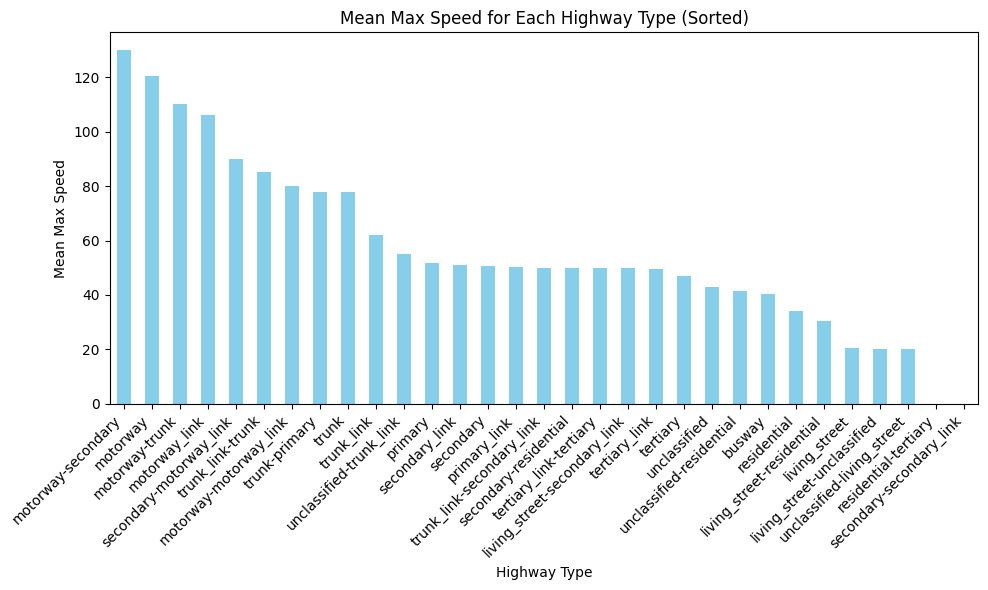

In [92]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'highway' and compute the mean of 'maxspeed'
grouped_data = edges_reset.groupby('highway')['maxspeed'].mean()

# Sort the values by mean maxspeed in descending order
grouped_data_sorted = grouped_data.sort_values(ascending=False)

# Plot the grouped and sorted data as a bar graph
plt.figure(figsize=(10, 6))
grouped_data_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Mean Max Speed for Each Highway Type (Sorted)')
plt.xlabel('Highway Type')
plt.ylabel('Mean Max Speed')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

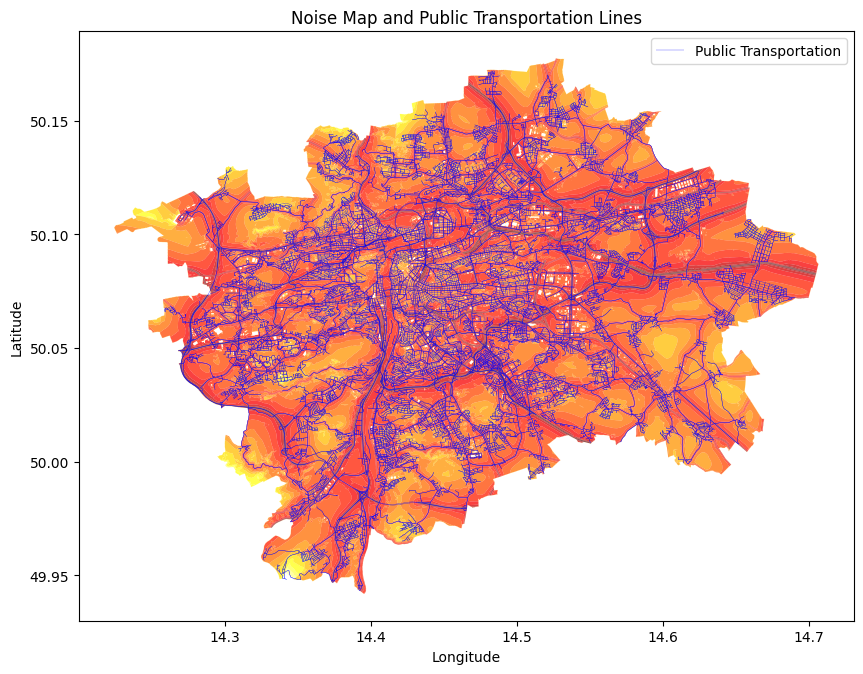

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
edges.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

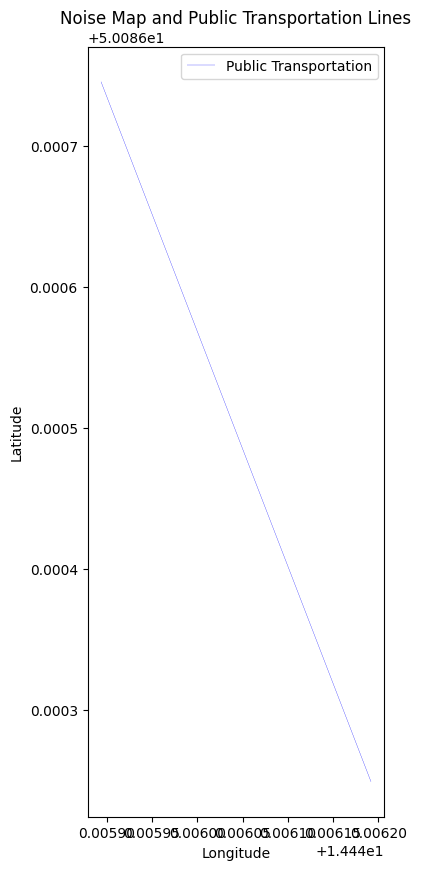

In [73]:

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
# noise.plot(
#     column="DB_HI",
#     cmap="hot_r",
#     scheme="quantiles",
#     k=noise.shape[0],
#     edgecolor="white",
#     linewidth=0.0,
#     alpha=0.75,
#     legend=True,
#     legend_kwds=dict(loc=2),
#     ax=ax,
# )
# Plot the public transportation lines
rows_with_maxspeed_50.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

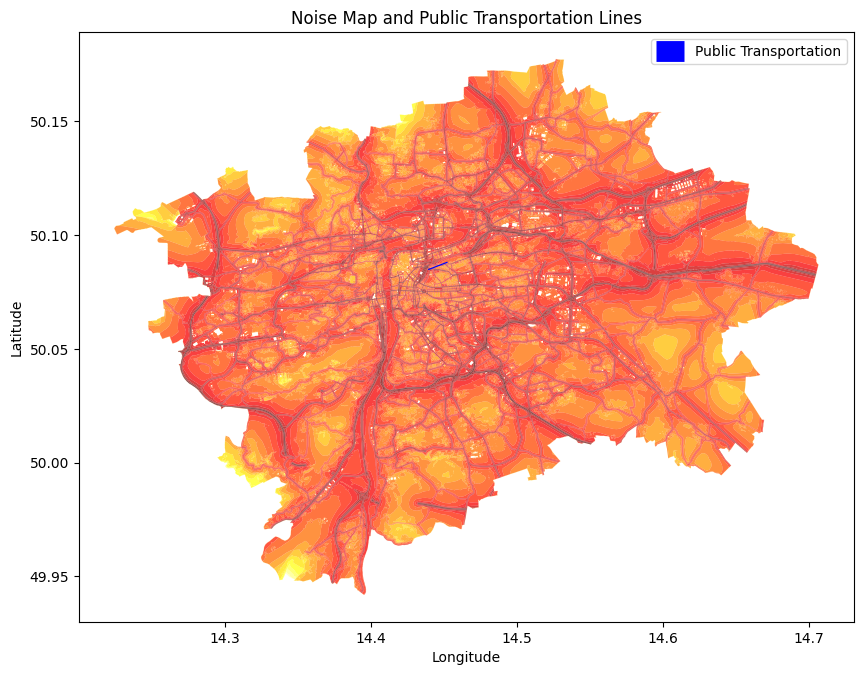

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
#Plot the public transportation lines
rows_with_maxspeed_50.plot(ax=ax, color="blue", linewidth=15, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [94]:
import pandas as pd

C:\Users\kajet\AppData\Local\Temp\ipykernel_45416\1918072127.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


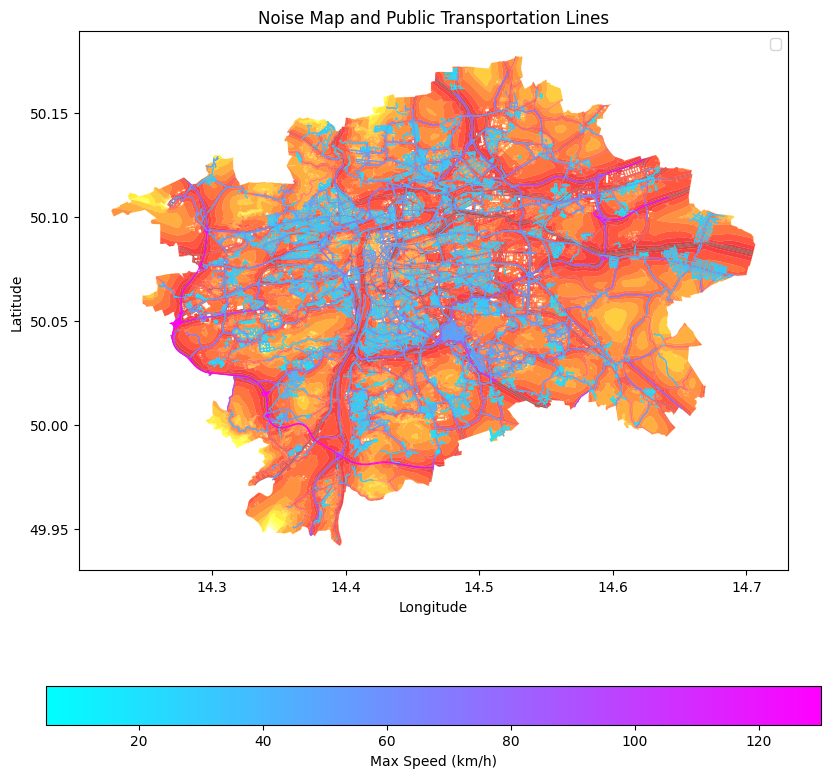

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))

#edges_reset['maxspeed'] = pd.to_numeric(edges['maxspeed'], errors='coerce')  # This will turn non-numeric values into NaN

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
edges_reset.plot(
    ax=ax,
    column='maxspeed',  # Use maxspeed as the column to color roads by
    cmap='cool',  # Choose a color map that suits your needs
    legend=True,  # Show the legend
    legend_kwds={'label': "Max Speed (km/h)", 'orientation': "horizontal"},
    #edgecolor='black',  # Black edges for the roads
    linewidth=0.7
)
# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_45416\3129309695.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


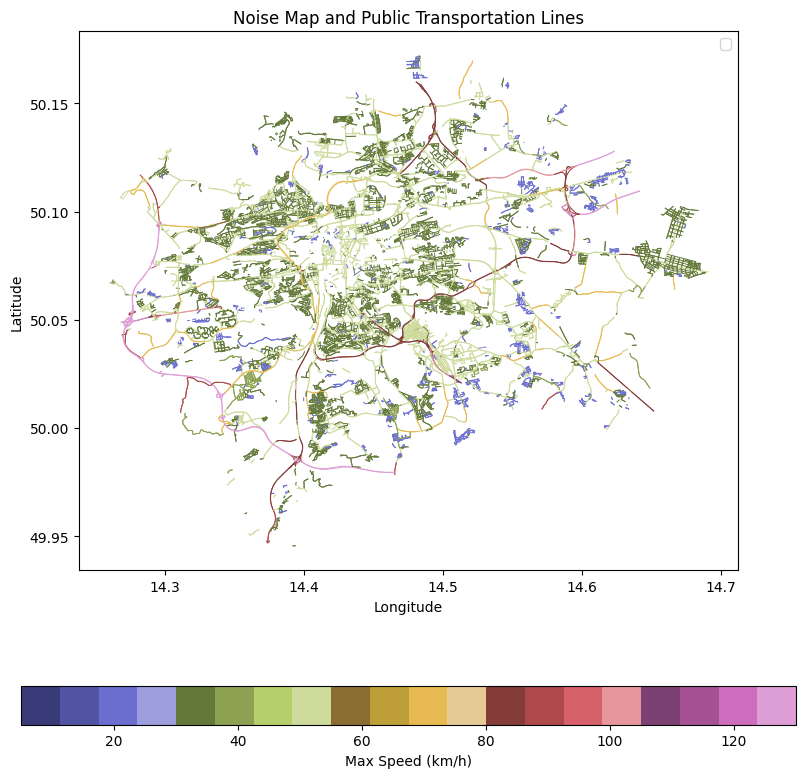

In [111]:
fig, ax = plt.subplots(figsize=(10, 10))

#edges_reset['maxspeed'] = pd.to_numeric(edges['maxspeed'], errors='coerce')  # This will turn non-numeric values into NaN

# Plot the public transportation lines
edges_reset.plot(
    ax=ax,
    column='maxspeed',  # Use maxspeed as the column to color roads by
    cmap='tab20b',  # Choose a color map that suits your needs
    legend=True,  # Show the legend
    legend_kwds={'label': "Max Speed (km/h)", 'orientation': "horizontal"},
    #edgecolor='black',  # Black edges for the roads
    linewidth=0.7
)
# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()